In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Radar config (from textfile)
rx = 4
tx = 3
n = 512
chirp = 64
IQ = 2

In [3]:
def test_step(fn, data):
    start = time.time()
    out = fn(data)
    end = time.time()

    print("Execution time: {:5f}".format(end - start))
    print("Output shape: {}".format(str(out.shape)))

    return out

In [4]:
def radarcube(adc):
    cube_ = adc.reshape(rx, IQ, n, tx, chirp, order='F')
    cube_ = np.moveaxis(cube_, [0,1,2,3,4], [2,0,4,1,3])
    cube = cube_[0] + 1j * cube_[1]
    return cube

In [5]:
def rangedoppler(cube):
    rdm = np.fft.fft2(cube, axes=(0,1))
    rdm = np.fft.fftshift(rdm, axes=(0))
    return rdm

In [11]:
def visualize(rdm):
    plt.imshow(np.abs(rdm.T), origin='lower', aspect='auto', vmin=0, vmax=100000000)
    plt.show()
    return rdm

In [7]:
# Load IQ data from disk
path = '/tmp/data/adc_data1.txt'
adc_data = np.fromfile(path, sep='\n')

# Create radar cube
newcube = test_step(radarcube, adc_data)

Execution time: 0.004161
Output shape: (3, 4, 64, 512)


In [8]:
# Select RX
frame = newcube[0][0]

In [12]:
# Calculate 2D FFt
newrdm = test_step(rangedoppler, frame)

Execution time: 0.000730
Output shape: (64, 512)


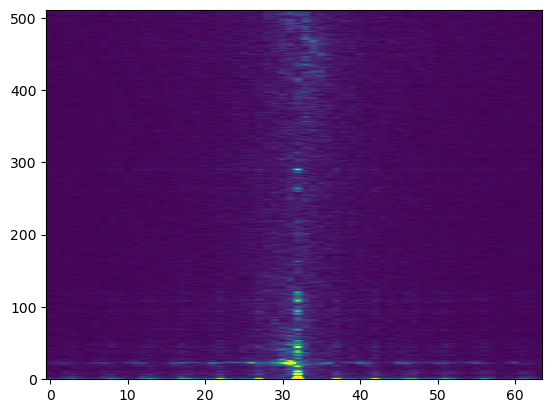

Execution time: 0.162480
Output shape: (64, 512)


In [13]:
test_step(visualize, newrdm);